In [173]:
import pandas as pd

In [174]:
df=pd.read_csv("users/baoqiangzhang/Downloads/sales_data.csv")

In [175]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
...,...,...,...,...,...
1045,Product_42,Region_3,18.63,9.0,2023-07-10
1046,Product_4,Region_3,159.27,10.0,2024-07-14
1047,Product_43,Region_1,2.91,13.0,2023-08-17
1048,Product_27,Region_7,1.96,8.0,2024-03-10


In [176]:
missing = df.isnull().sum()  #see what missing value in the dataset.
print(missing)

Product       103
Region        108
Price         105
Units Sold    107
Sale Date       0
dtype: int64


In [177]:
duplicate_rows = df.duplicated()
duplicate_rows = df.duplicated(subset=['Product', 'Region', 'Price', 'Units Sold', 'Sale Date'])
print(duplicate_rows.sum())
#check if there is any duplicates

49


In [178]:
df = df.drop_duplicates()
# drop all duplicates

In [179]:
duplicate_rows = df.duplicated()
print(duplicate_rows.sum())
#all duplicates gone

0


In [180]:
columns_drop = ['Product', 'Region', 'Units Sold']
df = df.dropna(subset=columns_drop) 
#I can fill price with median but product has vary price even with same product, so I can not guess the product name, same as region and units sold.


In [181]:
missing1 = df.isnull().sum()
print(missing1) 
# so I dropped them and trying to find the price average to fill the missing data.

Product        0
Region         0
Price         74
Units Sold     0
Sale Date      0
dtype: int64


In [182]:
average_prices = df.groupby(['Product', 'Region'])['Price'].mean()
print(average_prices) 
#I find average price of the product in different region to fill the missing data.

Product    Region   
Product_1  Region_1     125.890
           Region_10    100.230
           Region_2      13.380
           Region_3      72.550
           Region_4     168.340
                         ...   
Product_9  Region_5      62.825
           Region_6      44.340
           Region_7         NaN
           Region_8     146.220
           Region_9      76.010
Name: Price, Length: 389, dtype: float64


In [183]:
df['Price'] = df.groupby('Region')['Price'].transform(lambda x: x.fillna(x.mean()))
#fill the missing price

In [184]:
print(df.isnull().sum()) 
# all the missing data is gone.

Product       0
Region        0
Price         0
Units Sold    0
Sale Date     0
dtype: int64


In [185]:
df['Total'] = df['Units Sold'] * df['Price'] 
#I want to creat a new column named 'total' so i can see how much money they spend.

In [186]:
print(df.head())

      Product    Region       Price  Units Sold   Sale Date        Total
1  Product_40  Region_2   46.190000        10.0  2022-01-02   461.900000
2   Product_1  Region_5  102.667711         4.0  2022-01-03   410.670843
3   Product_6  Region_8  143.470000         8.0  2022-01-04  1147.760000
4  Product_44  Region_4  122.540000        10.0  2022-01-05  1225.400000
5  Product_21  Region_8   15.760000        20.0  2022-01-06   315.200000


In [187]:
df_region_1 = df[df['Region'] == 'Region_1'] 
df_region_1.describe
 #I want to see which product sold most in region_1,but not working.

<bound method NDFrame.describe of         Product    Region       Price  Units Sold   Sale Date      Total
36   Product_42  Region_1   95.540000        14.0  2022-02-06  1337.5600
50   Product_39  Region_1  219.550000         8.0  2022-02-20  1756.4000
55   Product_47  Region_1   20.120000         2.0  2022-02-25    40.2400
65   Product_32  Region_1  100.615167        15.0  2022-03-07  1509.2275
73   Product_34  Region_1  124.300000        12.0  2022-03-15  1491.6000
..          ...       ...         ...         ...         ...        ...
900  Product_22  Region_1  141.160000         8.0  2024-06-19  1129.2800
926  Product_40  Region_1   39.270000        16.0  2024-07-15   628.3200
927   Product_8  Region_1   53.860000         7.0  2024-07-16   377.0200
964  Product_22  Region_1   58.480000        13.0  2024-08-22   760.2400
967   Product_3  Region_1  103.840000        13.0  2024-08-25  1349.9200

[69 rows x 6 columns]>

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns


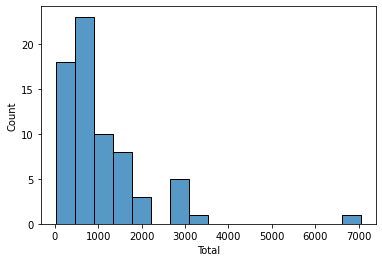

In [189]:
sns.histplot(data=df_region_1, x='Total')
plt.show()
#The graph shows people's consumption level but there is an outlier.

In [190]:
df_region_1[df_region_1['Total']>3000]
#check the outlier

,Product,Region,Price,Units Sold,Sale Date,Total
160,Product_14,Region_1,469.65,15.0,2022-06-10,7044.75
687,Product_45,Region_1,289.70,11.0,2023-11-19,3186.70


In [191]:
df1=df_region_1[df_region_1['Total']<2500]
#remove outlier

In [192]:
Total_units_sold1 = df_region_1.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
#Check how many products sold in region 1

In [193]:
Total_units_sold1.head(5) 
#top5 selling products

Product
Product_14    36.0
Product_12    32.0
Product_23    30.0
Product_42    29.0
Product_10    28.0
Name: Units Sold, dtype: float64

In [194]:
Total_units_sold1.tail(5) 
#worst selling products

Product
Product_49    8.0
Product_36    7.0
Product_5     7.0
Product_6     6.0
Product_47    2.0
Name: Units Sold, dtype: float64

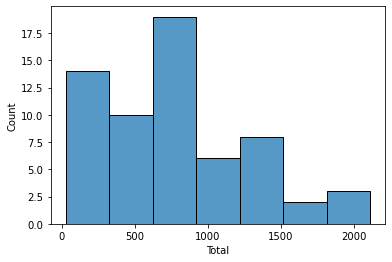

In [195]:
sns.histplot(data=df1, x='Total')
plt.show() 
#without outlier most people spend on products under $1000

In [196]:
ttpregion1 = df1.groupby('Product')['Total'].sum().sort_values(ascending=False)
#findout each product total sell in region1

In [197]:
ttpregion1.head(5) 
#top 5 most selling products in region 1

Product
Product_10    3234.632333
Product_23    2874.836167
Product_42    2605.000000
Product_39    2550.240000
Product_32    2314.148833
Name: Total, dtype: float64

In [198]:
ttpregion1.tail(5) 
#worst sell products in region 1, tookout product_14 $7000 as outlier.

Product
Product_14    375.45
Product_30    275.60
Product_20    258.00
Product_26    122.64
Product_47     40.24
Name: Total, dtype: float64

In [199]:
df_region_2 = df[df['Region'] == 'Region_2'] 
#repeat the steps from region2-10

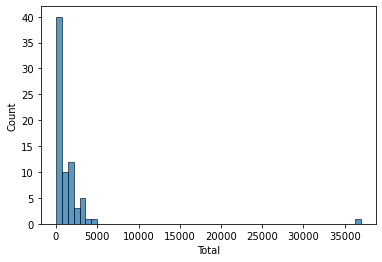

In [200]:
sns.histplot(data=df_region_2, x='Total')
plt.show()

In [201]:
df_region_2[df_region_2['Total']>5000]

,Product,Region,Price,Units Sold,Sale Date,Total
421,Product_34,Region_2,2636.9,14.0,2023-02-26,36916.6


In [202]:
df2=df_region_2[df_region_2['Total']<5000]

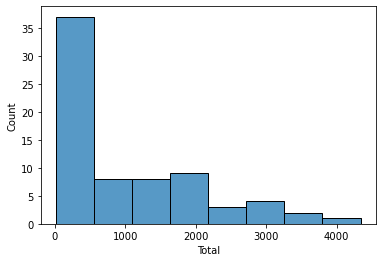

In [203]:
sns.histplot(data=df2, x='Total')
plt.show() #people purchase product mostly under $500

In [204]:
ttpregion2 = df2.groupby('Product')['Total'].sum().sort_values(ascending=False)

In [205]:
ttpregion2.head(5)

Product
Product_48    6672.044348
Product_49    5179.684058
Product_22    4907.820000
Product_50    4523.850000
Product_27    4502.240000
Name: Total, dtype: float64

In [206]:
ttpregion2.tail(5)

Product
Product_44    195.12
Product_16    112.80
Product_1      80.28
Product_25     71.40
Product_20     54.54
Name: Total, dtype: float64

In [207]:
Total_units_sold2 = df_region_2.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)


In [208]:
Total_units_sold2.head(5)

Product
Product_49    74.0
Product_48    60.0
Product_23    29.0
Product_10    28.0
Product_40    25.0
Name: Units Sold, dtype: float64

In [209]:
Total_units_sold2.tail(5)

Product
Product_44    8.0
Product_36    7.0
Product_25    7.0
Product_20    6.0
Product_1     6.0
Name: Units Sold, dtype: float64

In [210]:
df_region_3 = df[df['Region'] == 'Region_3']

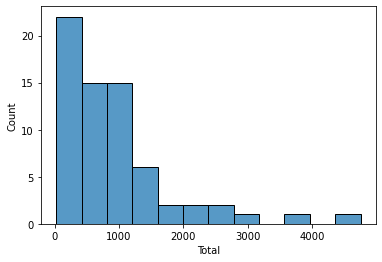

In [211]:
sns.histplot(data=df_region_3, x='Total')
plt.show()

In [212]:
df_region_3[df_region_3['Total']>2000]

,Product,Region,Price,Units Sold,Sale Date,Total
116,Product_46,Region_3,485.84,8.0,2022-04-27,3886.72
166,Product_2,Region_3,211.85,12.0,2022-06-16,2542.20
293,Product_37,Region_3,344.45,8.0,2022-10-21,2755.60
370,Product_41,Region_3,204.58,14.0,2023-01-06,2864.12
423,Product_40,Region_3,365.73,13.0,2023-02-28,4754.49
703,Product_41,Region_3,116.51,18.0,2023-12-05,2097.18
780,Product_49,Region_3,204.44,11.0,2024-02-20,2248.84


In [213]:
df3=df_region_3[df_region_3['Total']<2000]

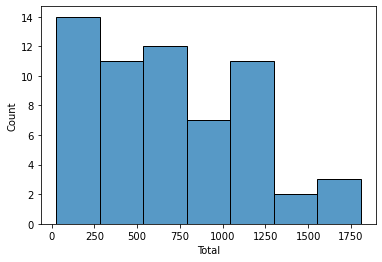

In [214]:
sns.histplot(data=df3, x='Total')
plt.show()

In [215]:
ttpregion3 = df3.groupby('Product')['Total'].sum().sort_values(ascending=False)

In [216]:
ttpregion3.head(5)

Product
Product_4     3522.230000
Product_8     2909.640000
Product_24    2232.450000
Product_1     2062.409474
Product_26    1969.842632
Name: Total, dtype: float64

In [217]:
ttpregion3.tail(5)

Product
Product_44    255.10
Product_25    180.10
Product_42    167.67
Product_38    142.60
Product_27     96.36
Name: Total, dtype: float64

In [218]:
Total_units_sold3 = df_region_3.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)


In [219]:
Total_units_sold3.head(5)

Product
Product_41    45.0
Product_9     41.0
Product_26    40.0
Product_4     35.0
Product_37    34.0
Name: Units Sold, dtype: float64

In [220]:
Total_units_sold3.tail(5)

Product
Product_29    8.0
Product_32    7.0
Product_17    6.0
Product_25    5.0
Product_27    4.0
Name: Units Sold, dtype: float64

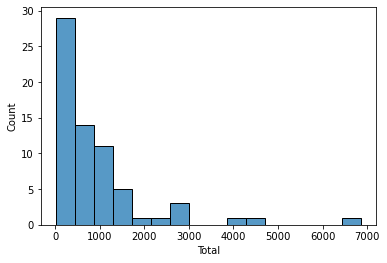

In [221]:
df_region_4 = df[df['Region'] == 'Region_4']
sns.histplot(data=df_region_4, x='Total')
plt.show()

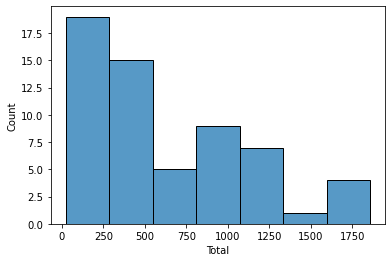

In [222]:
df_region_4[df_region_4['Total']>2000]
df4=df_region_4[df_region_4['Total']<2000]
sns.histplot(data=df4, x='Total')
plt.show()

In [223]:
ttpregion4 = df4.groupby('Product')['Total'].sum().sort_values(ascending=False)
ttpregion4.head(5)

Product
Product_45    4101.180345
Product_50    2842.150000
Product_42    2302.470000
Product_19    2061.920690
Product_8     2001.363103
Name: Total, dtype: float64

In [224]:
ttpregion4.tail(5)

Product
Product_24    116.48
Product_3     110.11
Product_22    106.26
Product_1      71.73
Product_12     57.63
Name: Total, dtype: float64

In [225]:
Total_units_sold4 = df_region_4.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
Total_units_sold4.head(5)

Product
Product_45    55.0
Product_36    39.0
Product_42    38.0
Product_19    38.0
Product_26    34.0
Name: Units Sold, dtype: float64

In [226]:
Total_units_sold4.tail(5)

Product
Product_6     7.0
Product_24    7.0
Product_23    6.0
Product_48    6.0
Product_43    5.0
Name: Units Sold, dtype: float64

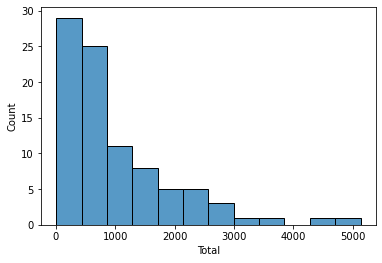

In [227]:
df_region_5 = df[df['Region'] == 'Region_5']
sns.histplot(data=df_region_5, x='Total')
plt.show()

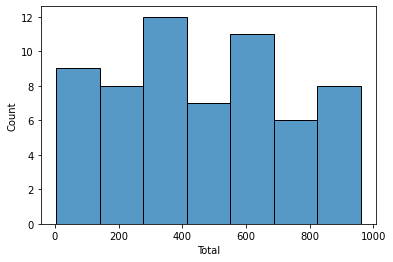

In [228]:
df_region_5[df_region_5['Total']>1000]
df5=df_region_5[df_region_5['Total']<1000]
sns.histplot(data=df5, x='Total')
plt.show()

In [229]:
ttpregion5 = df5.groupby('Product')['Total'].sum().sort_values(ascending=False)
ttpregion5.head(5)

Product
Product_8     1941.561687
Product_47    1614.530000
Product_40    1459.080000
Product_24    1442.980000
Product_28    1246.620000
Name: Total, dtype: float64

In [230]:
ttpregion5.tail(5)

Product
Product_34    201.67
Product_30    164.90
Product_23    157.26
Product_9      75.54
Product_32     38.16
Name: Total, dtype: float64

In [231]:
Total_units_sold5 = df_region_5.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
Total_units_sold5.head(5)

Product
Product_8     53.0
Product_24    47.0
Product_25    38.0
Product_4     34.0
Product_32    32.0
Name: Units Sold, dtype: float64

In [232]:
Total_units_sold5.tail(5)

Product
Product_20    7.0
Product_6     7.0
Product_15    5.0
Product_12    5.0
Product_10    4.0
Name: Units Sold, dtype: float64

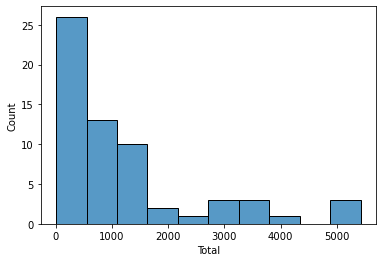

In [233]:
df_region_6 = df[df['Region'] == 'Region_6']
sns.histplot(data=df_region_6, x='Total')
plt.show()

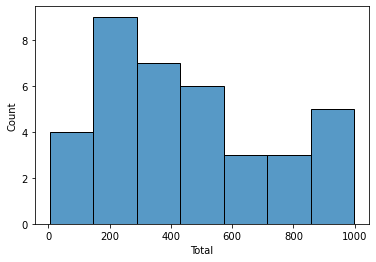

In [234]:
df_region_6[df_region_6['Total']>1000]
df6=df_region_6[df_region_6['Total']<1000]
sns.histplot(data=df6, x='Total')
plt.show()

In [235]:
ttpregion6 = df6.groupby('Product')['Total'].sum().sort_values(ascending=False)
ttpregion6.head(5)

Product
Product_7     2274.620000
Product_40    1660.100000
Product_1     1381.820000
Product_30    1377.671034
Product_4     1100.060000
Name: Total, dtype: float64

In [236]:
ttpregion6.tail(5)

Product
Product_48    237.78
Product_12    214.69
Product_31    211.05
Product_16     49.72
Product_46      4.26
Name: Total, dtype: float64

In [237]:
Total_units_sold6 = df_region_6.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
Total_units_sold6.head(5)

Product
Product_7     43.0
Product_20    39.0
Product_2     30.0
Product_37    28.0
Product_17    27.0
Name: Units Sold, dtype: float64

In [238]:
Total_units_sold6.tail(5)

Product
Product_48    9.0
Product_31    9.0
Product_50    7.0
Product_46    6.0
Product_44    5.0
Name: Units Sold, dtype: float64

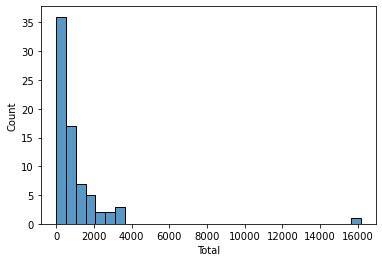

In [239]:
df_region_7 = df[df['Region'] == 'Region_7']
sns.histplot(data=df_region_7, x='Total')
plt.show()

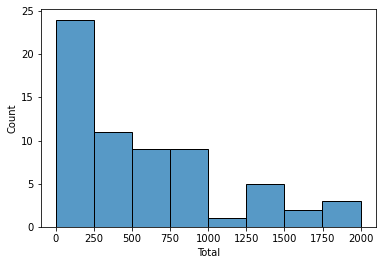

In [271]:
df_region_7[df_region_7['Total']>4000]
df7=df_region_7[df_region_7['Total']<2000]
sns.histplot(data=df7, x='Total')
plt.show()

In [249]:
ttpregion7 = df7.groupby('Product')['Total'].sum().sort_values(ascending=False)
ttpregion7.head(5)

Product
Product_45    4533.04
Product_23    4084.82
Product_24    4040.92
Product_46    4018.10
Product_36    3816.95
Name: Total, dtype: float64

In [250]:
ttpregion7.tail(5)

Product
Product_25    210.28
Product_7     204.80
Product_47    161.52
Product_16     67.90
Product_27     15.68
Name: Total, dtype: float64

In [251]:
Total_units_sold7 = df_region_7.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
Total_units_sold7.head(5)

Product
Product_24    60.0
Product_3     55.0
Product_46    43.0
Product_4     37.0
Product_21    33.0
Name: Units Sold, dtype: float64

In [252]:
Total_units_sold7.tail(5)

Product
Product_49    9.0
Product_6     8.0
Product_7     8.0
Product_25    7.0
Product_9     5.0
Name: Units Sold, dtype: float64

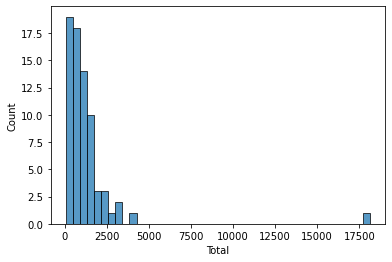

In [253]:
df_region_8 = df[df['Region'] == 'Region_8']
sns.histplot(data=df_region_8, x='Total')
plt.show()

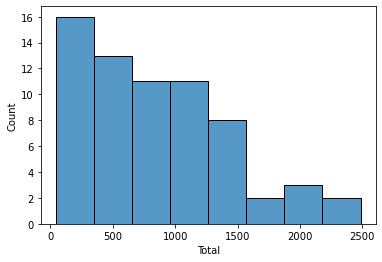

In [254]:
df_region_8[df_region_8['Total']>5000]
df8=df_region_8[df_region_8['Total']<2500]
sns.histplot(data=df8, x='Total')
plt.show()

In [255]:
ttpregion8 = df8.groupby('Product')['Total'].sum().sort_values(ascending=False)
ttpregion8.head(5)

Product
Product_6     4092.750000
Product_17    4070.800000
Product_10    3885.779242
Product_32    3110.770000
Product_43    2889.480000
Name: Total, dtype: float64

In [256]:
ttpregion8.tail(5)

Product
Product_40    470.76
Product_27    389.84
Product_8     376.42
Product_38    336.60
Product_20     76.40
Name: Total, dtype: float64

In [257]:
Total_units_sold8 = df_region_8.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
Total_units_sold8.head(5)

Product
Product_10    45.0
Product_32    41.0
Product_6     36.0
Product_15    34.0
Product_23    34.0
Name: Units Sold, dtype: float64

In [258]:
Total_units_sold8.tail(5)

Product
Product_3     9.0
Product_4     9.0
Product_22    8.0
Product_20    8.0
Product_38    5.0
Name: Units Sold, dtype: float64

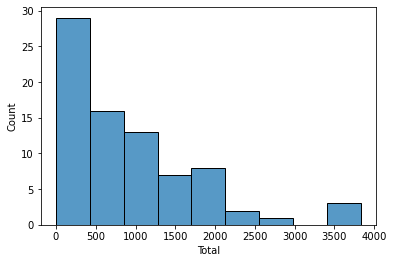

In [259]:
df_region_9 = df[df['Region'] == 'Region_9']
sns.histplot(data=df_region_9, x='Total')
plt.show()

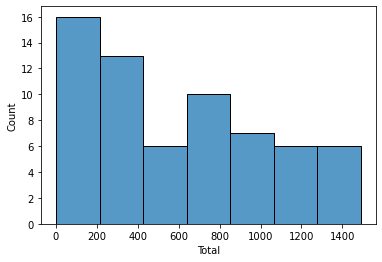

In [260]:
df_region_9[df_region_9['Total']>2500]
df9=df_region_9[df_region_9['Total']<1500]
sns.histplot(data=df9, x='Total')
plt.show()

In [261]:
ttpregion9 = df9.groupby('Product')['Total'].sum().sort_values(ascending=False)
ttpregion9.head(5)

Product
Product_33    3574.450000
Product_13    3059.610000
Product_45    2606.348571
Product_21    2400.910000
Product_4     2303.250000
Name: Total, dtype: float64

In [262]:
ttpregion9.tail(5)

Product
Product_37    233.50
Product_28    160.60
Product_25     25.48
Product_8       4.86
Product_36      2.97
Name: Total, dtype: float64

In [263]:
Total_units_sold9 = df_region_9.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
Total_units_sold9.head(5)

Product
Product_10    37.0
Product_13    36.0
Product_24    35.0
Product_38    35.0
Product_33    35.0
Name: Units Sold, dtype: float64

In [264]:
Total_units_sold9.tail(5)

Product
Product_17    7.0
Product_3     7.0
Product_34    6.0
Product_8     6.0
Product_16    6.0
Name: Units Sold, dtype: float64

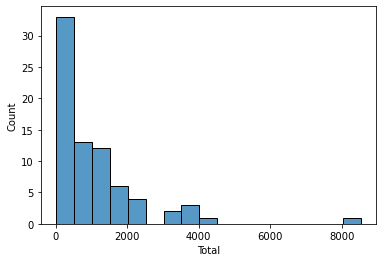

In [265]:
df_region_10 = df[df['Region'] == 'Region_10']
sns.histplot(data=df_region_10, x='Total')
plt.show()

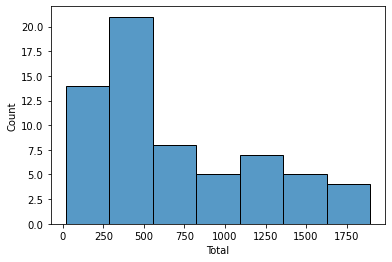

In [266]:
df_region_10[df_region_10['Total']>45000]
df10=df_region_10[df_region_10['Total']<2000]
sns.histplot(data=df10, x='Total')
plt.show()

In [267]:
ttpregion10 = df10.groupby('Product')['Total'].sum().sort_values(ascending=False)
ttpregion10.head(5)

Product
Product_49    4352.411791
Product_4     3364.067313
Product_12    2919.950000
Product_25    2805.349552
Product_11    2794.250000
Name: Total, dtype: float64

In [268]:
ttpregion10.tail(5)

Product
Product_46    262.24
Product_23    231.96
Product_18    146.70
Product_14    128.59
Product_31     17.60
Name: Total, dtype: float64

In [269]:
Total_units_sold10 = df_region_10.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
Total_units_sold10.head(5)

Product
Product_40    38.0
Product_7     36.0
Product_12    35.0
Product_4     34.0
Product_29    31.0
Name: Units Sold, dtype: float64

In [270]:
Total_units_sold10.tail(5)

Product
Product_17    8.0
Product_38    7.0
Product_14    7.0
Product_50    6.0
Product_21    4.0
Name: Units Sold, dtype: float64

In [ ]:
#     I looked over the dataset and findout that even the same product can 
#have very different price in the same region. But I still believe that within
#the same country product should be able to explain how consumer favers one 
#product over the other one. I have compared most selling products in quantity
#and the sold amount, compare them together we are able to findout the favored 
#products in specific region. At the same time I also demonstrate the people's
# "purchase power" which means how much they usually spend on the products. Such 
#as region8 people spend fairly even under $1500 to purchase products, but people
#in region7 mostly only spend under $250. There could be serval different reasons
#can cause problem, such as the market share, population, competition, etc, with 
#the further infomation, I can give more specific recommendation to the company.
#


